In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [26]:
# Load the data
file_path = 'Final_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [27]:
# Feature selection: choose relevant features or perform feature engineering
selected_features = ['Monthly SKUs Purchased', 'Monthly Vendors Purchased', 'Monthly Number of Sales', 'Monthly Sum Sales ($)', 'Monthly Gross Margin ($)']  # Replace with your chosen features
data = data[selected_features + ['Churned']]

In [28]:
# Handling categorical data
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [29]:
# Splitting the dataset into the training set and test set
X = data.drop('Churned', axis=1)
y = data['Churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# KNN Model
k_range = range(1, 100)  # Trying different k values from 1 to 100
scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    print ('At k value {}, the accuracy calculated is {}'.format(k, scores[k]))

At k value 1, the accuracy calculated is 0.9752615465217178
At k value 2, the accuracy calculated is 0.9862309468065947
At k value 3, the accuracy calculated is 0.9855269405196548
At k value 4, the accuracy calculated is 0.9863946691989063
At k value 5, the accuracy calculated is 0.9863782969596752
At k value 6, the accuracy calculated is 0.9864437859165998
At k value 7, the accuracy calculated is 0.9864437859165998
At k value 8, the accuracy calculated is 0.9864437859165998
At k value 9, the accuracy calculated is 0.9864274136773686
At k value 10, the accuracy calculated is 0.9864437859165998
At k value 11, the accuracy calculated is 0.9864437859165998
At k value 12, the accuracy calculated is 0.9864437859165998
At k value 13, the accuracy calculated is 0.9864437859165998
At k value 14, the accuracy calculated is 0.9864437859165998
At k value 15, the accuracy calculated is 0.9864437859165998
At k value 16, the accuracy calculated is 0.9864437859165998
At k value 17, the accuracy calcu

In [40]:
# Finding the best k
best_k = max(scores, key=scores.get)
best_score = scores[best_k]

print("Best K:", best_k)
print("Best Score:", best_score)

Best K: 6
Best Score: 0.9864437859165998


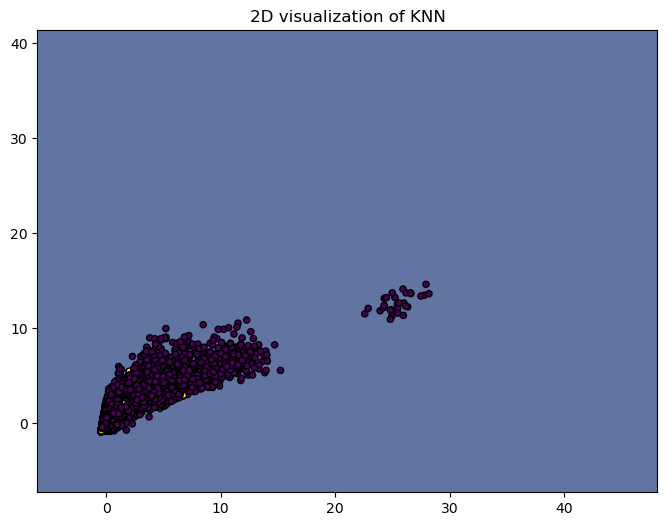

In [42]:
# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plotting the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2D visualization of KNN")
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = pd.read_csv('Final_data.csv')

# Convert categorical variables
label_encoder = LabelEncoder()
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])

# Extract year and month from 'YearMonth'
data['Year'] = pd.to_datetime(data['YearMonth']).dt.year
data['Month'] = pd.to_datetime(data['YearMonth']).dt.month

# Drop original date fields and other non-numeric fields
data = data.drop(columns=['YearMonth', 'Monthly Last Sales Date', 'Monthly First Sales Date', 'End of Month'])

# Separate features and target variable
X = data.drop('Churned', axis=1)
y = data['Churned']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the best K obtained from cross-validation
best_k = 9  # Replace with the actual best K value obtained

# Train the KNN model on the entire training set using the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = knn_optimal.score(X_test, y_test)

# Output the accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9868123772102161
